# Example of using `beatfinder`

In [19]:
import beatfinder
import torch
from IPython.display import Audio

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

Device: cpu


Load a pretrained model.

In [20]:
model = beatfinder.model.load('./data/pretrained-models/model_11.pt', device)

Load an audio sample.

In [21]:
example = beatfinder.datasets.load(audio_file='./data/BALLROOM/BallroomData/Samba/Media-103902.wav',
                                   offset=0, duration=10)

Use the model to predict which onsets are beats (by default this information is stored in `./tmp/`).

In [22]:
example.predict(model, device)

Look at the result.

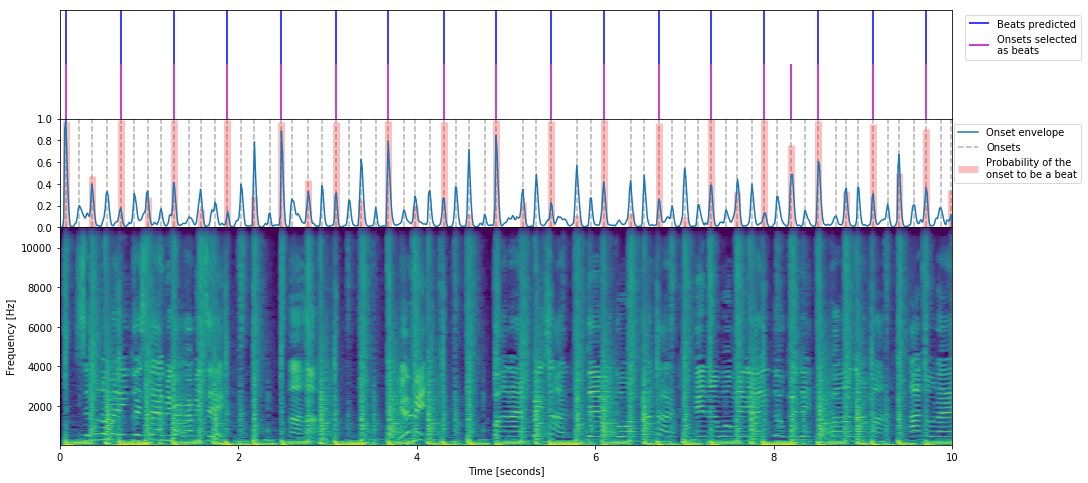

In [23]:
example.showdata(beatfinder=model, device=device)

Listen to the result.

In [24]:
beats_predicted = example.predicted_beats()[0]
clicks = beatfinder.display.clicks(example.get_wav(), beats_predicted)
Audio(clicks, rate=beatfinder.constants.sr)

## If a beats file is available for comparision

A `beats_files` is a text file containing the ground truth beats (in second) as float numbers (one per row). If this is available, we can plot it for comparison.

In [25]:
example = beatfinder.datasets.load(audio_file='./data/BALLROOM/BallroomData/Samba/Media-106004.wav',
                                   beats_file='./data/BALLROOM/beats/Media-106004.beats',
                                   offset=0, duration=10)

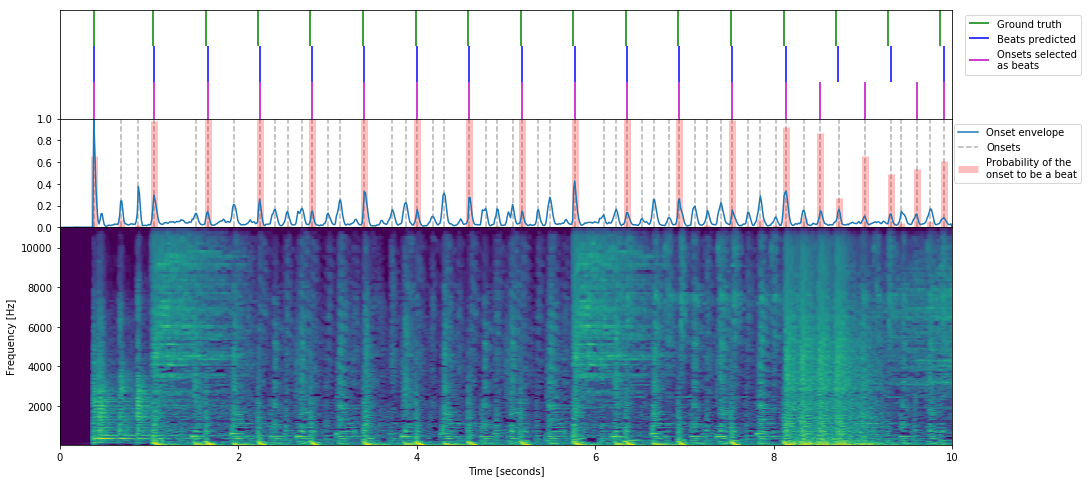

In [26]:
example.predict(model, device)
example.showdata(beatfinder=model, device=device)

And also listen to the ground truth beats:

In [27]:
clicks = beatfinder.display.clicks(example.get_wav(), example.get_beats())
Audio(clicks, rate=beatfinder.constants.sr)